In [1]:
from centrex_tlf import hamiltonian, states
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_states_approx = states.generate_coupled_states_ground(Js=[0, 1, 2, 3])


In [3]:
H_reduced = hamiltonian.reduced_hamiltonian.generate_reduced_X_hamiltonian(
    X_states_approx=X_states_approx,
    Jmin=0,
    Jmax=3,
)


In [4]:
B_states_approx = states.generate_coupled_states_excited(
    Js=[1, 2, 3], Ps=None, Omegas=[-1, 1]
)

In [5]:
H_reduced_omega = hamiltonian.reduced_hamiltonian.generate_reduced_B_hamiltonian(
    B_states_approx=B_states_approx, Jmin=1, Jmax=5, rtol=1e-5
)

c:\Users\ogras\Documents\GitHub\CeNTREX-TlF\.venv\Lib\site-packages\centrex_tlf\hamiltonian\reduced_hamiltonian.py:316: SyntaxWarning: generate_reduced_B_hamiltonian called in Ω basis; mapping states to approximate states not implemented. Hamiltonian is not reduced.
  warnings.warn(


In [6]:
B_states_approx = states.generate_coupled_states_excited(
    Js=[1, 2, 3], Ps=[-1, 1], Omegas=1
)

H_reduced_parity = hamiltonian.reduced_hamiltonian.generate_reduced_B_hamiltonian(
    B_states_approx=B_states_approx, Jmin=1, Jmax=5, rtol=1e-5
)

In [7]:
np.allclose(np.diag(H_reduced_parity.H), np.diag(H_reduced_omega.H)[:120])

False

c:\Users\ogras\Documents\GitHub\CeNTREX-TlF\.venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ogras\Documents\GitHub\CeNTREX-TlF\.venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


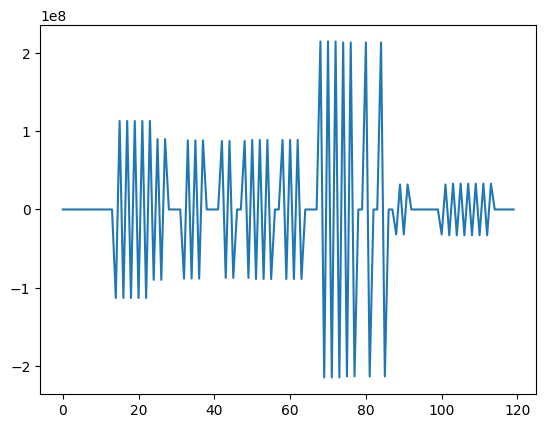

In [8]:
fig, ax = plt.subplots()
ax.plot(np.diag(H_reduced_parity.H) - np.diag(H_reduced_omega.H)[:120])

In [9]:
for qnO, qnP in zip(
    H_reduced_omega.QN_basis,
    H_reduced_parity.QN_basis,
):
    print(qnO.transform_to_parity_basis())
    print(qnP)
    print(
        qnO.transform_to_parity_basis().remove_small_components()
        == qnP.remove_small_components()
    )
    print("=" * 50)

1.00+0.00j x |B, J = 1, F₁ = 1/2, F = 0, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>

1.00+0.00j x |B, J = 1, F₁ = 1/2, F = 0, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>
True
1.00+0.00j x |B, J = 1, F₁ = 1/2, F = 0, mF = 0, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 1>

1.00-0.00j x |B, J = 1, F₁ = 1/2, F = 0, mF = 0, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 1>
True
1.00+0.00j x |B, J = 1, F₁ = 1/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>
0.02+0.00j x |B, J = 1, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>
0.02+0.00j x |B, J = 2, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>

1.00-0.00j x |B, J = 1, F₁ = 1/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>
0.02-0.00j x |B, J = 1, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>
0.02-0.00j x |B, J = 2, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 1>
False
1.00+0.00j x |B, J = 1, F₁ = 1/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 1>
0.02+0.00j x |B, J = 1, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I

In [10]:
import cProfile

cProfile.run(
    "hamiltonian.reduced_hamiltonian.generate_reduced_B_hamiltonian(B_states_approx=B_states_approx, Jmin=1, Jmax=5, rtol=1e-5)",
    "profile.prof",
)

In [11]:
X_states_approx = states.generate_coupled_states_ground(Js=[0, 1, 2, 3])

H_reduced = hamiltonian.reduced_hamiltonian.generate_reduced_X_hamiltonian(
    X_states_approx=X_states_approx,
    Jmin=0,
    Jmax=3,
)